# Section \#1: Centralized Algorithms

## Section \#1.1: LINEAR REGRESSION

Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from data_load import load
import scipy.io as io
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [88]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.   
    """
    X_train, y_train = load('regression_train.csv')
    X_val, y_val = load('regression_val.csv')
    X_test, y_test = load('regression_test.csv')
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test= get_data()  


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Validation data shape: ',X_val.shape)
print('Validation target shape: ',y_val.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (20, 1)
Train target shape:  (20,)
Validation data shape:  (20, 1)
Validation target shape:  (20,)
Test data shape:  (20, 1)
Test target shape:  (20,)


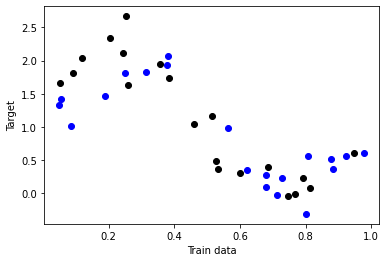

In [3]:
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Train data')
plt.ylabel('Target')
plt.show()

a) The visualized data shown above appears to have a sinusoidal pattern which would make linear regression not very effective at seperating the data.

### Training Linear Regression

In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

In [4]:
from Regression import Regression

In [83]:
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print('Loss for m = 1:', loss)
print('Gradient for m = 1:',grad)
##

Loss for m = 1: [[2.01169237]]
Gradient for m = 1: [-2.2602119  -0.67366233]


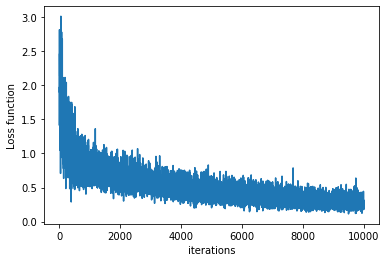

Weight: [[ 1.91478942]
 [-1.74618367]]
Loss function final value: [0.22708448]


In [84]:
## Complete train_LR function in Regression.py file 
loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=20, num_iters=10000)
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print('Weight:', w)
print('Loss function final value:',loss_history[9999])

e) The best values after testing appear to be eta=1e-2,batch_size=10, num_iters=10000 which consistently produced loss values of approximately 0.10

In [21]:
## Complete closed_form function in Regression.py file
loss_2, w_2 = regression.closed_form(X_train, y_train)
print('Loss for closed form:', loss_2)
print('Gradient for closed form:', w_2)

Loss: 0.1956288202895732
Gradient: [ 2.44640709 -2.81635359]


f) We can compare the closed form loss to the gradient descent loss and see that the closed form performs better than the gradient

Test loss for m = 3 [0.13834158]


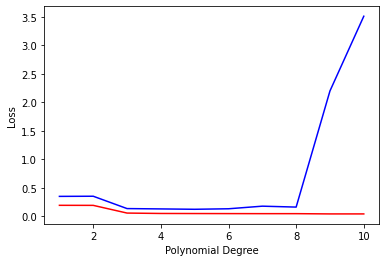

Best m: 5
Test loss for best m [0.12612282]


In [96]:
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #


#N,d = X.shape


#print(loss_2)
#print(w_2)
#print(y_train.shape)





for m in range(0,10):
    regression = Regression(m=m+1, reg_param=0)
    #print(m)
    if m+1 == 1:
        X = X_train
        X_t = X_test
    else:
        X = regression.gen_poly_features(X_train)
        X_t = regression.gen_poly_features(X_test)
    trn_loss, w = regression.closed_form(X, y_train)
    train_loss[m] = trn_loss
    #print(w)
    #print(X)
    y_pred = regression.predict(X_t)
    tst_loss = 0.0
    temp = []
    for i in range(0,len(y_pred)):
        #print(y_pred[i])
        #print(y_train[i])
        temp = (y_pred[i] - y_test[i])*(y_pred[i] - y_test[i])
        #print(temp)
        tst_loss = tst_loss + temp
    test_loss[m] = tst_loss/(len(y_pred))
#print(test_loss)
#print(train_loss)

## Plot the training and test loss ##

print('Test loss for m = 3', test_loss[2])
plt.plot(np.arange(1,11), train_loss, color='red')
plt.plot(np.arange(1,11), test_loss, color='blue')
plt.xlabel('Polynomial Degree')
plt.ylabel('Loss')
plt.show()
best_m_ind = int(np.where(test_loss == np.amin(test_loss))[0])
print('Best m:', best_m_ind+1)
print('Test loss for best m', test_loss[best_m_ind])
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #



We can see in the plot above that as m approaches 8 - 10, we start to see large test loss which signifies we are overfitting the training data. Based on analysis of the lowest test loss, we see that m = 5 gives us the best performance.

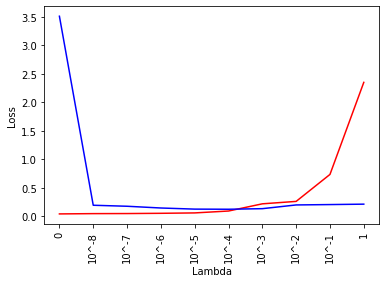

Best Lambda: 10^-4


In [32]:
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for lambda from set of values given.
# ================================================================ #
reg_terms = [0, (1/10) ** 8, (1/10) ** 7, (1/10) ** 6, (1/10) ** 5, (1/10) ** 4, (1/10) ** 3, (1/10) ** 2, (1/10) ** 1, 1]
j = 0
for r in reg_terms:
    
    regression = Regression(m=10, reg_param=r)
    X = regression.gen_poly_features(X_train)
    X_t = regression.gen_poly_features(X_test)
    trn_loss, w = regression.closed_form(X, y_train)
    train_loss[j] = trn_loss
    #print(w)
    #print(X)
    y_pred = regression.predict(X_t)
    tst_loss = 0.0
    temp = []
    for i in range(0,len(y_pred)):
        #print(y_pred[i])
        #print(y_train[i])
        temp = (y_pred[i] - y_test[i])*(y_pred[i] - y_test[i])
        #print(temp)
        tst_loss = tst_loss + temp
    test_loss[j] = tst_loss/(len(y_pred))
    j = j + 1
reg_term_labels = ['0', '10^-8', '10^-7', '10^-6', '10^-5', '10^-4', '10^-3', '10^-2', '10^-1', 1]
line1 = plt.plot(np.arange(1,11), train_loss, color='red', )
line2 = plt.plot(np.arange(1,11), test_loss, color='blue')

plt.xticks(np.arange(1,11),reg_term_labels, rotation='vertical')
plt.xlabel('Lambda')
plt.ylabel('Loss')

plt.show()
best_lambda_ind = int(np.where(test_loss == np.amin(test_loss))[0])
print('Best Lambda:', reg_term_labels[best_lambda_ind])
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #